In [1]:
import pandas as pd
import seaborn as sn

data = pd.read_excel("RMERJ_analise.xlsx")
                   
print(data)


                    Município          ANP   IQA  INEP_IBGE Grupo       IBP
0           Belford Roxo (RJ)    21.847221  1.00   0.367401     A -0.861601
1   Cachoeiras de Macacu (RJ)    79.183349  0.63   0.418383     A -0.719277
2        Duque de Caxias (RJ)   108.868264  0.79   0.478524     C -1.013740
3             Guapimirim (RJ)    84.963783  0.86   0.443849     A -0.783699
4               Itaboraí (RJ)    25.193239  0.57   0.431653     C -0.789716
5                Itaguaí (RJ)    90.552578  0.77   0.534062     A -1.017820
6                 Japeri (RJ)    26.592697  0.50   0.441954     C -0.624980
7                   Magé (RJ)    94.901766  0.59   0.531789     B -0.808139
8                 Maricá (RJ)  1386.932151  0.77   0.416467     A -1.114486
9               Mesquita (RJ)    21.847221  0.84   0.422557     C -1.197180
10             Nilópolis (RJ)    21.847221  0.79   0.443003     C -1.414947
11               Niterói (RJ)   640.480955  1.00   0.388959     A -1.516573
12          

In [2]:
data = data.drop(columns=['Município'])
correlation = data.corr()

<AxesSubplot:>

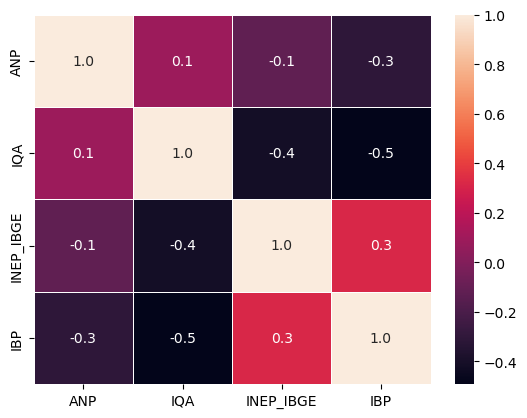

In [3]:
plot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

In [2]:
#FUZZY_PYTHON
#!pip install scikit-fuzzy

     -------------------------------------- 994.0/994.0 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894075 sha256=1daca0f3d96cfe0b65d9c7a8be36652d6135991f6ee6e0d7b679e5fb377846af
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\32\2c\a1\a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


In [4]:
import numpy as np
anp = data["ANP"]
mat = data["INEP_IBGE"]
agu = data["IQA"]
sim = data["IBP"]
anp = anp.values
mat = mat.values
agu = agu.values
sim = sim.values

In [5]:
anp = np.sort(anp)
mat = np.sort(mat)
agu = np.sort(agu)
sim = np.sort(sim)

C:\Users\USER\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


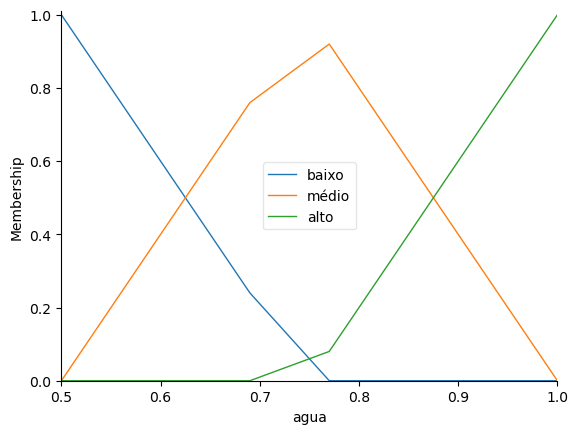

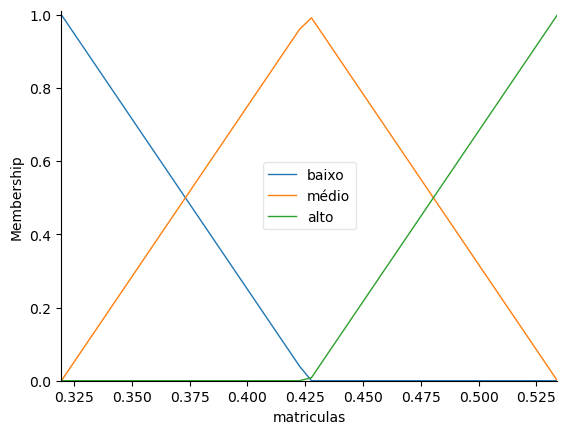

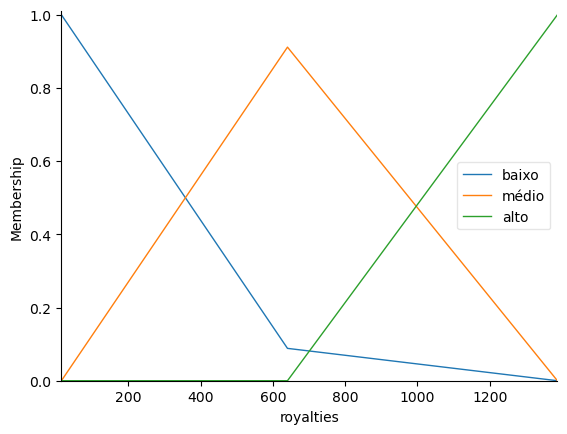

In [6]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Cria as variáveis do problema
royalties = ctrl.Antecedent(anp, 'royalties')
matriculas = ctrl.Antecedent(mat, 'matriculas')
agua = ctrl.Antecedent(agu, 'agua')
#simulador_ibp = ctrl.Consequent(sim, 'simulador_ibp')
simulador_ibp = ctrl.Consequent(sim, 'simulador_ibp')

# Cria automaticamente o mapeamento entre valores nítidos e difusos 
# usando uma função de pertinência padrão (triângulo)
royalties.automf(names=['baixo', 'médio', 'alto'])
matriculas.automf(names=['baixo', 'médio', 'alto'])
agua.automf(names=['baixo', 'médio', 'alto'])
simulador_ibp.automf(names=['muito baixo','baixo', 'médio', 'alto','muito alto'])

agua.view()
matriculas.view()
royalties.view()

In [7]:
#Regras de decisão

rule1 = ctrl.Rule(agua['alto'] & matriculas['alto'] & royalties['alto'], simulador_ibp['muito alto'])
rule2 = ctrl.Rule(agua['alto'] & (matriculas['médio'] | royalties['médio']), simulador_ibp['alto'])
rule3 = ctrl.Rule(agua['médio'] & (matriculas['alto'] | royalties['alto']), simulador_ibp['médio'])
rule4 = ctrl.Rule(agua['baixo'], simulador_ibp['baixo'])
rule5 = ctrl.Rule(agua['baixo'] & matriculas['baixo'] & royalties['baixo'], simulador_ibp['muito baixo'])

indice_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
indice_simulador = ctrl.ControlSystemSimulation(indice_ctrl)

# Entrando com alguns valores (Ex_RJ)
indice_simulador.input['agua'] = 0.91
indice_simulador.input['matriculas'] = 0.403415
indice_simulador.input['royalties'] = 219.839448


# Computando o resultado
indice_simulador.compute()
print(indice_simulador.output['simulador_ibp'])


-0.8519848554856758


In [10]:
import pandas as pd
#import seaborn as sn

data = pd.read_excel("RMERJ_analise.xlsx")

data.dtypes

Município     object
ANP          float64
IQA          float64
INEP_IBGE    float64
Grupo         object
IBP          float64
dtype: object

In [13]:
#definindo uma função
def fuzzy(mun):
    
    for index, col in data.iterrows():
        if col['Município'] == mun:
            indice_simulador.input['agua'] = col['IQA']
            indice_simulador.input['matriculas'] = col['INEP_IBGE']
            indice_simulador.input['royalties'] = col['ANP']
            indice_simulador.compute()
            print(mun, indice_simulador.output['simulador_ibp'])
#fuzzy("Rio de Janeiro (RJ)")

def cfuzzy(conj):
    for i in conj:
        #if i in vg.Município:
            fuzzy(i)
        #else:
            #print(i, "Grupo D")
            
RM = ["Belford Roxo (RJ)", "Duque de Caxias (RJ)", "Guapimirim (RJ)", "Itaboraí (RJ)", 'Itaguaí (RJ)', 'Japeri (RJ)', 'Magé (RJ)',
     'Mesquita (RJ)', 'Nilópolis (RJ)', 'Niteroí (RJ)', 'Nova Iguaçu (RJ)', 'Queimados (RJ)', 'Rio de Janeiro (RJ)','São Gonçalo (RJ)',
      'São João de Meriti (RJ)', 'Seropédica (RJ)', 'Tanguá (RJ)', "Paracambi (RJ)", 'Cachoeiras de Macacu (RJ)', 'Maricá (RJ)',
     'Petrópolis (RJ)', 'Rio Bonito (RJ)']
cfuzzy(RM)
fuzzy('Niterói (RJ)')

Belford Roxo (RJ) -0.8530082329244709
Duque de Caxias (RJ) -1.0411291401860001
Guapimirim (RJ) -0.9377717148973613
Itaboraí (RJ) -1.267082711304057
Itaguaí (RJ) -1.0667003670634563
Japeri (RJ) -1.2860011706400607
Magé (RJ) -1.199570115522307
Mesquita (RJ) -0.85388044598766
Nilópolis (RJ) -1.002082942223526
Nova Iguaçu (RJ) -0.8808485291707782
Queimados (RJ) -0.9787099550906417
Rio de Janeiro (RJ) -0.8534267491754901
São Gonçalo (RJ) -0.868779787068503
São João de Meriti (RJ) -0.8525210121313312
Seropédica (RJ) -1.1582209735642237
Tanguá (RJ) -0.9106789350716942
Paracambi (RJ) -0.9448157444836783
Cachoeiras de Macacu (RJ) -1.2931561903969493
Maricá (RJ) -1.0667003670634563
Petrópolis (RJ) -0.9567532260667505
Rio Bonito (RJ) -0.8592578506182557
Niterói (RJ) -0.8515862811327707


Duque de Caxias (RJ) -1.0411291401860001


C:\Users\USER\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


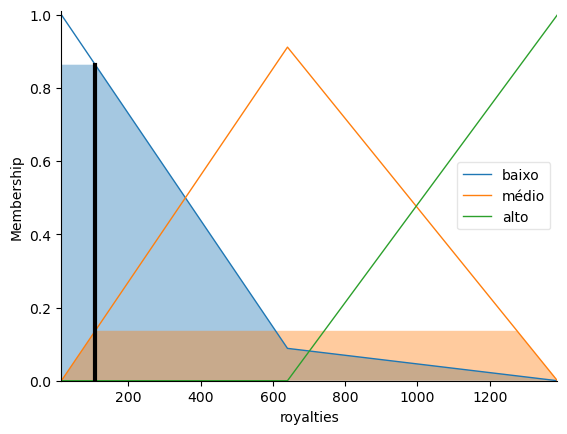

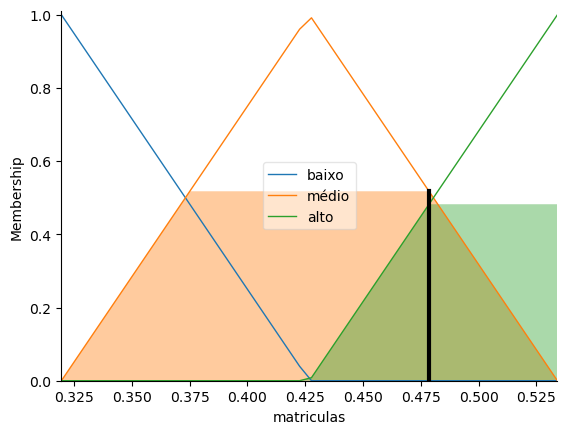

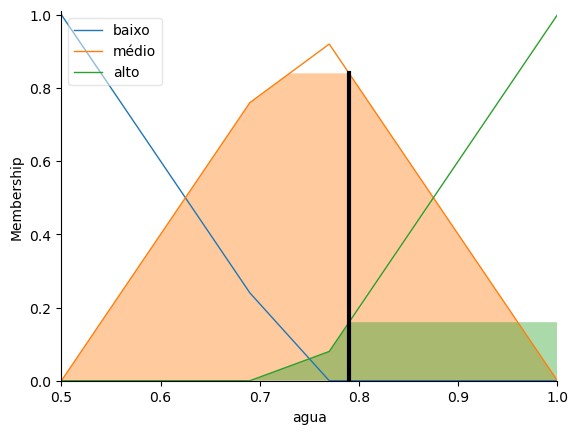

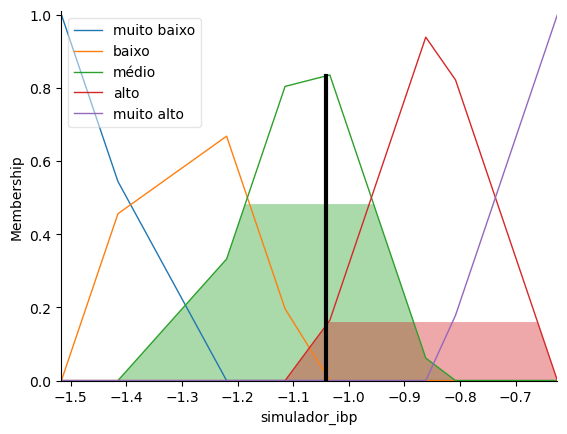

In [12]:
#Gráficos individuais de municipios
fuzzy('Duque de Caxias (RJ)')

royalties.view(sim=indice_simulador)
matriculas.view(sim=indice_simulador)
agua.view(sim=indice_simulador)
simulador_ibp.view(sim=indice_simulador)

Rio de Janeiro (RJ) -0.8534267491754901


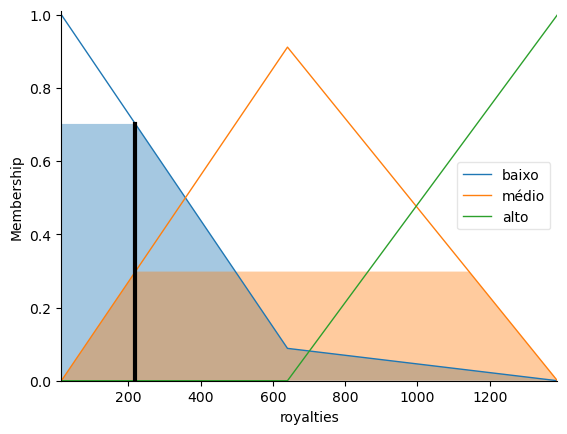

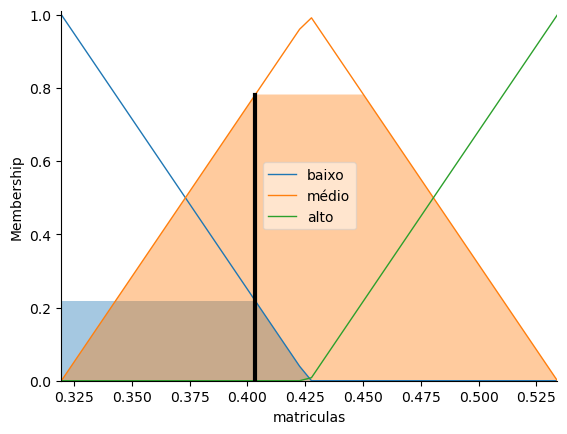

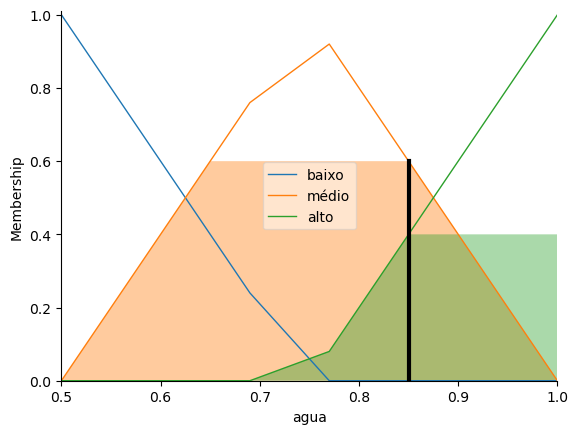

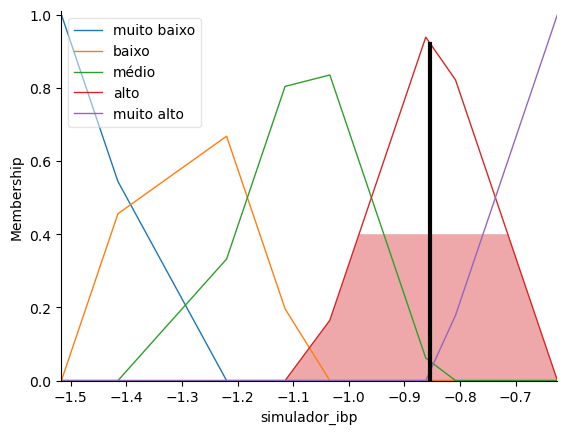

In [14]:
#Gráficos individuais de municipios
fuzzy('Rio de Janeiro (RJ)')

royalties.view(sim=indice_simulador)
matriculas.view(sim=indice_simulador)
agua.view(sim=indice_simulador)
simulador_ibp.view(sim=indice_simulador)

In [1]:
import pandas as pd
#import seaborn as sn

data = pd.read_excel("RMERJ_analise.xlsx")
data = data.drop(columns=['Município', 'IBP'])

data

,ANP,IQA,INEP_IBGE,Grupo
0,21.847221,1.00,0.367401,A
1,79.183349,0.74,0.418383,A
2,108.868264,0.79,0.478524,C
3,84.963783,0.95,0.443849,A
4,25.193239,0.57,0.431653,C
5,90.552578,0.84,0.534062,A
6,26.592697,0.50,0.441954,C
7,94.901766,0.79,0.531789,B
8,1386.932151,0.89,0.416467,A
9,21.847221,0.84,0.422557,C


In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
X_data = data.drop(columns=['Grupo'])
X_data = X_data.values
y_data = data["Grupo"].values
y_data.shape
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 4)


In [3]:
rede_neural = MLPClassifier(max_iter=1000, verbose = True, tol = 0.0001, hidden_layer_sizes = (2,2))
rede_neural.fit(X_train,y_train)

Iteration 1, loss = 11.22973052
Iteration 2, loss = 11.16701498
Iteration 3, loss = 11.10468356
Iteration 4, loss = 11.04274074
Iteration 5, loss = 10.98119079
Iteration 6, loss = 10.92003783
Iteration 7, loss = 10.85928580
Iteration 8, loss = 10.79893843
Iteration 9, loss = 10.73899925
Iteration 10, loss = 10.67947160
Iteration 11, loss = 10.62035857
Iteration 12, loss = 10.56166308
Iteration 13, loss = 10.50338778
Iteration 14, loss = 10.44553513
Iteration 15, loss = 10.38810734
Iteration 16, loss = 10.33110642
Iteration 17, loss = 10.27453413
Iteration 18, loss = 10.21839202
Iteration 19, loss = 10.16268141
Iteration 20, loss = 10.10740343
Iteration 21, loss = 10.05255897
Iteration 22, loss = 9.99814873
Iteration 23, loss = 9.94417319
Iteration 24, loss = 9.89063265
Iteration 25, loss = 9.83752723
Iteration 26, loss = 9.78485686
Iteration 27, loss = 9.73262130
Iteration 28, loss = 9.68082015
Iteration 29, loss = 9.62945284
Iteration 30, loss = 9.57851867
Iteration 31, loss = 9.52801

MLPClassifier(hidden_layer_sizes=(2, 2), max_iter=1000, verbose=True)

In [4]:
previsoes = rede_neural.predict(X_test)
previsoes


array(['A', 'A', 'A', 'A', 'A', 'A', 'A'], dtype='<U1')

In [5]:
y_test 

array(['A', 'A', 'A', 'A', 'C', 'A', 'A'], dtype=object)

In [6]:
previsoes_total = rede_neural.predict(X_data)# COLOCA X_Data aqui! PARA PREVER TUDO
previsoes_total

array(['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A'], dtype='<U1')

In [7]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test, previsoes)

0.8571428571428571

0.8571428571428571

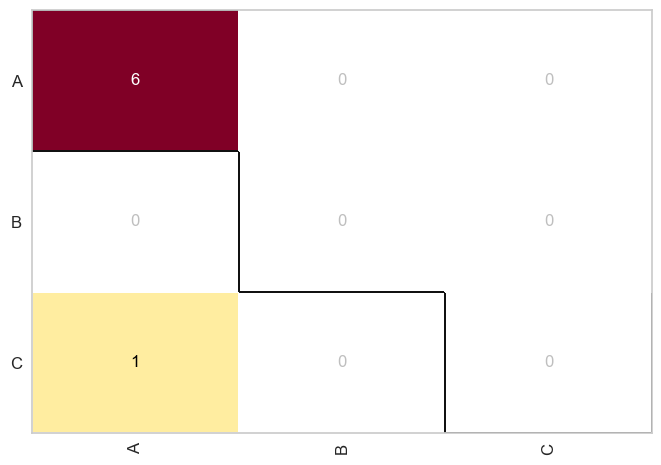

In [7]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(rede_neural)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [8]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

           A       0.86      1.00      0.92         6
           C       0.00      0.00      0.00         1

    accuracy                           0.86         7
   macro avg       0.43      0.50      0.46         7
weighted avg       0.73      0.86      0.79         7



C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
#AGORA REGRESSÃO COM KERAS
import pandas as pd
data = pd.read_excel("RMERJ_analise.xlsx")
data = data.drop(columns=['Município','Grupo'])
data

,ANP,IQA,INEP_IBGE,IBP
0,21.847221,1.00,0.367401,-0.861601
1,79.183349,0.63,0.418383,-0.719277
2,108.868264,0.79,0.478524,-1.013740
3,84.963783,0.86,0.443849,-0.783699
4,25.193239,0.57,0.431653,-0.789716
5,90.552578,0.77,0.534062,-1.017820
6,26.592697,0.50,0.441954,-0.624980
7,94.901766,0.59,0.531789,-0.808139
8,1386.932151,0.77,0.416467,-1.114486
9,21.847221,0.84,0.422557,-1.197180


               ANP        IQA  INEP_IBGE        IBP
count    22.000000  22.000000  22.000000  22.000000
mean    136.797930   0.795455   0.433342  -1.007335
std     310.121427   0.131139   0.048311   0.250597
min      15.293055   0.500000   0.319513  -1.516573
25%      21.847221   0.770000   0.416946  -1.181843
50%      23.887360   0.830000   0.434399  -0.994788
75%      89.155379   0.860000   0.445891  -0.821505
max    1386.932151   1.000000   0.534062  -0.624980
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               512       
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                

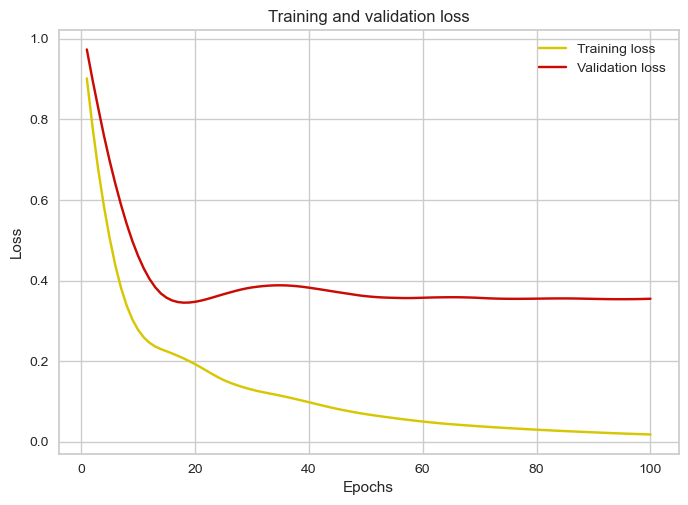

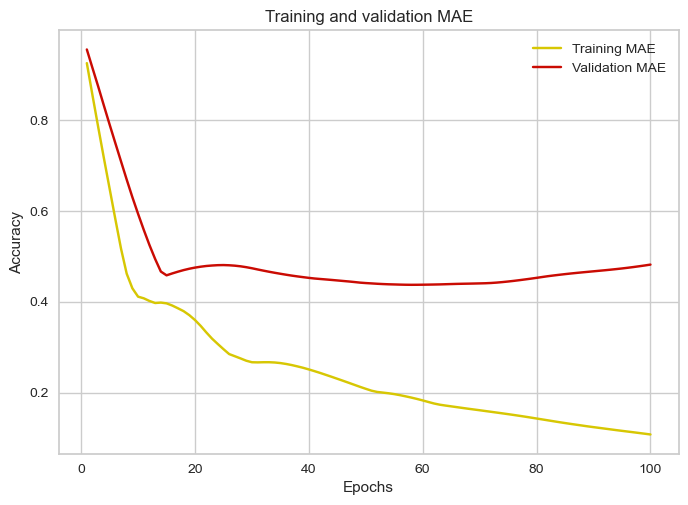

In [24]:
#import pandas as pd
#import seaborn as sn

from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# load data and arrange into Pandas dataframe

print(data.describe())


#Split into features and target (Price)
X = data.drop('IBP', axis = 1)
y = data['IBP']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 8)


#Scale data, otherwise model will fail.
#Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


# define the model
#Experiment with deeper and wider networks
model = Sequential()
model.add(Dense(128, input_dim=3, activation='relu'))
model.add(Dense(64, activation='relu'))
#Output layer
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()

history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs =100)

from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [25]:


############################################
#Predict on test data
predictions = model.predict(X_test_scaled[:5])
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:5])
##############################################

#Comparison with other models..
#Neural network - from the current code
mse_neural, mae_neural = model.evaluate(X_test_scaled, y_test)
print('Mean squared error from neural net: ', mse_neural)
print('Mean absolute error from neural net: ', mae_neural)


1/1 [==============================] - 0s 48ms/step
Predicted values are:  [[-1.0662422 ]
 [-1.4743068 ]
 [-0.9947734 ]
 [-0.41718125]
 [-1.1334021 ]]
Real values are:  6    -0.624980
7    -0.808139
4    -0.789716
11   -1.516573
13   -1.034028
Name: IBP, dtype: float64
1/1 [==============================] - 0s 22ms/step - loss: 0.2752 - mae: 0.3865
Mean squared error from neural net:  0.2751646637916565
Mean absolute error from neural net:  0.38647744059562683


In [26]:
results = model.evaluate(X_test, y_test)
print('loss: ', results[0])
print('accuracy: ', results[1])

1/1 [==============================] - 0s 82ms/step - loss: 3580.4116 - mae: 29.1136
loss:  3580.41162109375
accuracy:  29.113637924194336


In [30]:
X_scaled = scaler.transform(X)
predictions = model.predict(X_scaled)
print("Predicted values are: ", predictions)

1/1 [==============================] - 0s 30ms/step
Predicted values are:  [[-0.9803928 ]
 [-0.7693376 ]
 [-0.87793505]
 [-0.658304  ]
 [-0.9947734 ]
 [-1.0856062 ]
 [-1.0662422 ]
 [-1.4743068 ]
 [-1.1073676 ]
 [-1.0847105 ]
 [-1.2223372 ]
 [-0.41718125]
 [-1.0086936 ]
 [-1.1334021 ]
 [-1.0280663 ]
 [-0.9199881 ]
 [-0.9211643 ]
 [-0.4607139 ]
 [-1.1850007 ]
 [-1.0071357 ]
 [-1.273981  ]
 [-0.89681375]]


In [ ]:
#PYCARET - P/ CLASSIFICAÇÃO TESTAR DEPOIS
#!pip install pycaret
#Example 3.27 The PyCaret_demo.py

import pandas as pd
from sklearn import datasets
iris = datasets.load_iris(as_frame=True)
iris.data['Target'] = iris.target
iris = iris.data
iris.head()
from pycaret import classification
classification.setup(data= iris, target='Target')
classification.compare_models()
